# Project: Wrangling and Analyze Data
## By Odai Alsalieti

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import all libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

In [2]:
# Open the csv file
df_tweeter = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
# read image-predictions.tsv file
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#measure the elapsed wall-clock time
import time
start = time.time()
# Create dataframe from tweet-json.txt file
json_data = [] 
with open('tweet-json.txt', encoding='utf-8') as json_file:
    # loop line by line and append values to the created dataframe
    
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        tweet = data['full_text']
        url_tweet = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url_tweet
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
         
        json_data.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new DataFrame
df_json = pd.DataFrame(json_data, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
df_json.to_csv('tweet_json.txt', index=False)

end = time.time()
print(end - start)

0.13381290435791016


In [6]:
# Read the dataframe created
df_json = pd.read_csv('tweet_json.txt')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
# Display dataframe
df_tweeter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Get more information
df_tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Check unique_values in each columns
col_tw = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
for i in col_tw:
    print(i, df_tweeter[i].unique())

tweet_id [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
in_reply_to_status_id [           nan 8.86266357e+17 8.81607037e+17 8.79553827e+17
 8.70726203e+17 8.63425646e+17 6.67152164e+17 8.57156678e+17
 8.55818117e+17 8.56286004e+17 8.55861584e+17 8.55858536e+17
 8.50328819e+17 8.48212112e+17 8.47606176e+17 7.59099524e+17
 8.40698300e+17 8.38145499e+17 8.38085539e+17 8.35245984e+17
 8.32087548e+17 8.31903044e+17 8.26598365e+17 8.23326389e+17
 8.21152593e+17 8.13127252e+17 8.11627233e+17 7.33109485e+17
 8.01854331e+17 8.00857954e+17 7.97123751e+17 7.72743019e+17
 7.66711819e+17 7.63865175e+17 7.50180499e+17 7.47648654e+17
 7.46885919e+17 6.91416866e+17 7.38411920e+17 7.29113531e+17
 7.07980066e+17 7.03255936e+17 7.04485745e+17 7.03041950e+17
 6.96488711e+17 6.75349384e+17 6.70668383e+17 6.93642232e+17
 6.93572216e+17 6.92417313e+17 6.92041935e+17 6.90341254e+17
 6.86034025e+17 6.85547936e+17 6.84959799e+17 6.8448107

In [10]:
# Check all values in each columns
for i in col_tw:
    print(i, df_tweeter[i].value_counts())

tweet_id 892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64
in_reply_to_status_id 6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64
in_reply_to_user_id 4.196984e+09    47
2.195506e+07     2
2.281182e+09     1
1.132119e+08     1
1.637468e+07     1
4.670367e+08     1
1.198989e+09     1
2.878549e+07     1
2.319108e+09     1
3.589728e+08     1
4.717297e+09     1
1.584641e+07     1
7.305050e+17     1
2.916630e+07     1
2.918590e+08     1
1.185634e+07     1
2.068372e+07     1
1.582854e+09     1
4.738443e+07     1
3.058208e+07     1
2.625958e+

In [11]:
#Display dataframe
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# Get more information
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#  Check unique_values in each columns
col_img = ['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
for m in col_img:
    print(m, df_image[m].unique())

tweet_id [666020888022790149 666029285002620928 666033412701032449 ...
 891815181378084864 892177421306343426 892420643555336193]
jpg_url ['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg'
 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg' ...
 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg'
 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg'
 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg']
img_num [1 4 2 3]
p1 ['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog'
 'box_turtle' 'chow' 'shopping_cart' 'miniature_poodle' 'golden_retriever'
 'Gordon_setter' 'Walker_hound' 'pug' 'bloodhound' 'Lhasa'
 'English_setter' 'hen' 'desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'three-toed_sloth' 'ox' 'malamute' 'guinea_pig'
 'soft-coated_wheaten_terrier' 'Chihuahua' 'black-and-tan_coonhound'
 'coho' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'llama'
 'Chesapeake_Bay_ret

In [14]:
# Check all values in each columns
for m in col_img:
    print(m, df_image[m].value_counts())

tweet_id 666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64
jpg_url https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/med

In [15]:
# Display dataframe
df_json.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


In [16]:
# Get mor info
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   retweet_status  2354 non-null   object
 4   url             2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [17]:
#  Check unique_values in each columns
col_js = ['tweet_id', 'favorite_count', 'retweet_count', 'retweet_status', 'url']
for m in col_js:
    print(m, df_json[m].unique())

tweet_id [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
favorite_count [39467 33819 25461 ...   128   132  2535]
retweet_count [8853 6514 4328 ...  879   41  147]
retweet_status ['Original tweet']
url ['https://t.co/MgUWQ76dJU' 'https://t.co/0Xxu71qeIV'
 'https://t.co/wUnZnhtVJB' ... 'https://t.co/y671yMhoiR'
 'https://t.co/r7mOb2m0UI' 'https://t.co/BLDqew2Ijj']


In [18]:
# Check all values in each columns
for m in col_js:
    print(m, df_json[m].value_counts())

tweet_id 892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: tweet_id, Length: 2354, dtype: int64
favorite_count 0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64
retweet_count 1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64
retweet_status Original tweet    2354
Name: retweet_status, dtype: int64
url https:/…                   17
0                          17
https://…                  15
…                          11
https://t.c…                7
                           ..
https://t.co/HmwrdfEfUE     1
https://t.co/uPUAotqQtM     1

### Quality issues
1. 'None' assigned instead of 'NaN' for empty missing data {visual assessment}

2. 'tweet_id' not a string. {programmatic assessment}

3. 'source' column contains tag html. {visual assessment}

4. timestamp not in type dtime {programmatic assessment}

5.  column 'name' has values('a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo') {programmatic assessment}

6. Rating dinominator has different values instead of 10 {programmatic assessment}+{visual assessment}

7. expanded_urls has incorrect urls and duplicates such like:<br>(https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1 ) {programmatic assessment}

8. Column names are incomprehensible to the reader such as ('P1', 'P2', 'P3') and contain strange Predictions(spatula, barrow, minibus,paper_towel,laptop ) {visual assessment}

9. retweet_status has one value 'Original tweet' {visual assessment}

10. columns no need {'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',retweeted_status_timestamp', 'rating_denominator','img_num'}

11. Column names are not clear to the user { 'source', 'text', 'name'}

### Tidiness issues
1. Dataframes must be one df with No retweet ids  {visual assessment}

2. Dogtionary in 4 columns instead of one {visual assessment}

3. expanded_urls and url have same values {visual assessment}

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

# Tidiness issues:

### Issue #1 Dataframes must be one df with No retweet ids

#### Define Merge all 3 dfs

#### Code

In [19]:
df_js = df_json.copy()

In [20]:
df_mg = df_image.copy()

In [21]:
df_tw = df_tweeter.copy()

In [22]:
# Merge df_tw and df_js to be twitter_master_df
df_master = df_tw.merge(df_js, how='left')

In [23]:
# Merge df_mg and twitter_master_df
df_master = df_master.merge(df_mg, how='left')

In [24]:
# First we Remove Retweet rows from twitter_master_df
df_master = df_master[df_master.retweeted_status_id.isnull()]
df_master = df_master[df_master.retweeted_status_user_id.isnull()]
df_master = df_master[df_master.retweeted_status_timestamp.isnull()]
df_master = df_master[df_master.in_reply_to_status_id.isnull()]
df_master = df_master[df_master.in_reply_to_user_id.isnull()]

#### Test

In [25]:
print(df_master.shape)
df_master

(2097, 32)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [26]:
# Check if there duplicates in merged dataframe
df_master.duplicated().sum()

0

In [27]:
pd.set_option('display.max_rows', None) # set value to ‘None’ value means unlimited
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [28]:
# Check all values in each column
col = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'retweet_status', 'url', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog']
for i in col:
    print('column: ',i, df_master[i].value_counts())

column:  tweet_id 892420643555336193    1
683849932751646720    1
683857920510050305    1
684097758874210310    1
684122891630342144    1
684147889187209216    1
684177701129875456    1
684188786104872960    1
684195085588783105    1
684200372118904832    1
684222868335505415    1
684241637099323392    1
684460069371654144    1
684481074559381504    1
684567543613382656    1
684588130326986752    1
684594889858887680    1
684800227459624960    1
684830982659280897    1
684880619965411328    1
684902183876321280    1
684914660081053696    1
684926975086034944    1
684940049151070208    1
684959798585110529    1
685169283572338688    1
685198997565345792    1
685268753634967552    1
685307451701334016    1
685315239903100929    1
685321586178670592    1
683852578183077888    1
683834909291606017    1
685532292383666176    1
683828599284170753    1
682059653698686977    1
682088079302213632    1
682242692827447297    1
682259524040966145    1
682303737705140231    1
682389078323662849    

column:  expanded_urls https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                                                                                                                                                                               2
https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                                                                                                                                                                                                             1
https://vine.co/v/ihWIxntjtO7                                                        

Name: favorite_count, dtype: int64
column:  retweet_count 71.0       4
819.0      4
146.0      4
516.0      4
577.0      4
748.0      4
1124.0     4
3652.0     4
542.0      4
1972.0     4
557.0      3
619.0      3
424.0      3
2269.0     3
1207.0     3
792.0      3
608.0      3
572.0      3
2072.0     3
1231.0     3
261.0      3
576.0      3
3261.0     3
1035.0     3
183.0      3
265.0      3
917.0      3
115.0      3
315.0      3
1176.0     3
2511.0     3
937.0      3
231.0      3
426.0      3
393.0      3
61.0       3
306.0      3
523.0      3
1116.0     3
242.0      3
403.0      3
888.0      3
602.0      3
700.0      3
661.0      3
1265.0     3
896.0      3
2243.0     3
836.0      3
397.0      3
77.0       3
1011.0     3
776.0      3
119.0      3
3220.0     3
634.0      3
325.0      3
1320.0     3
234.0      3
401.0      2
666.0      2
2184.0     2
3712.0     2
2970.0     2
1314.0     2
3129.0     2
595.0      2
764.0      2
1224.0     2
936.0      2
530.0      2
611.0      2
735.0 

Name: url, dtype: int64
column:  jpg_url https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                                            1
https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg                                            1
https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg                                            1
https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg                                            1
https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg                                            1
https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg                                            1
https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg                                            1
https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg                                            1
https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg                                            1
https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg                                            1
https://pbs.twimg.com/media/C

In [29]:
# Check unique values in each column
for u in col:
    print(u,'\n', df_master[u].unique())

tweet_id 
 [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
in_reply_to_status_id 
 [nan]
in_reply_to_user_id 
 [nan]
timestamp 
 ['2017-08-01 16:23:56 +0000' '2017-08-01 00:17:27 +0000'
 '2017-07-31 00:18:03 +0000' ... '2015-11-15 23:21:54 +0000'
 '2015-11-15 23:05:30 +0000' '2015-11-15 22:32:08 +0000']
source 
 ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
text 
 ["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
 'This is Archie

In [30]:
# Get list for incomprehensible names
nm = np.array(df_master.name.unique())
list_unq_name =[]
for n in nm:
    if len(n)<= 2:
        list_unq_name.append(n)          
list_unq_name

['a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo']

### Issue #2: Dogtionary in 4 columns instead of one

#### Define : Concatenate all 4 columns in 1 col dogtionary , fix values and drop all 4th col

#### Code

In [31]:
#handle none
df_master.doggo.replace('None', '', inplace=True)
df_master.floofer.replace('None', '', inplace=True)
df_master.pupper.replace('None', '', inplace=True)
df_master.puppo.replace('None', '', inplace=True)

# Merge into a column
df_master['dogtionary'] = df_master.doggo + df_master.floofer + df_master.pupper + df_master.puppo

# handle multiple stages
df_master.loc[df_master.dogtionary == 'doggopupper', 'dogtionary'] = 'doggo, pupper'
df_master.loc[df_master.dogtionary == 'doggopuppo', 'dogtionary'] = 'doggo, puppo'
df_master.loc[df_master.dogtionary == 'doggofloofer', 'dogtionary'] = 'doggo, floofer'
# Handle missing values
df_master.loc[df_master.dogtionary == '', 'dogtionary'] = np.nan

In [32]:
# Get sample to check dog_stages column
df_master[['doggo','floofer','pupper','puppo','dogtionary']].sample(15)

,doggo,floofer,pupper,puppo,dogtionary
928,,,,,NaN
1803,,,,,NaN
994,,,,,NaN
1202,,,,,NaN
1650,,,,,NaN
356,,,,,NaN
2058,,,,,NaN
17,,,,,NaN
814,,,,,NaN
738,,,,,NaN


In [33]:
# Check values in dog_stages column
df_master.dogtionary.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dogtionary, dtype: int64

In [34]:
df_master.query('dogtionary == "doggo, pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,11901.0,3084.0,Original tweet,https://t.co/m7isZrOBX7,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,"doggo, pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,9701.0,2525.0,Original tweet,https://t.co/ANBpEYHaho,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,"doggo, pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,8992.0,2429.0,Original tweet,https://t.co/55Dqe0SJNj,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,"doggo, pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,8735.0,2561.0,Original tweet,https://t.co/f2wmLZTPHd,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,"doggo, pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,7973.0,2961.0,Original tweet,https://t.co/WQvcPEpH2u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"doggo, pupper"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,6620.0,2173.0,Original tweet,https://t.co/MYwR4DQKll,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,"doggo, pupper"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,4849.0,1265.0,Original tweet,https://t.co/u2c9c7qSg8,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,"doggo, pupper"
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,10342.0,3520.0,Original tweet,https://t.co/o5J479bZUC,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,"doggo, pupper"
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/downlo

In [35]:
df_master.query('dogtionary == "doggo, puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,,,puppo,47844.0,19196.0,Original tweet,https://t.co/cMhq16isel,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,"doggo, puppo"


In [36]:
df_master.query('dogtionary == "doggo, floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,,17169.0,3433.0,Original tweet,https://t.co/TXdT3tmuYk,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,"doggo, floofer"


> Drop ids That does not a dog rating after checking each id with this link:
https://twitter.com/dog_rates/status/817777686764523521

In [37]:
# Drop id that it is Not a dog
df_master.drop(df_master.query('tweet_id == 785639753186217984').index, inplace=True)

In [38]:
# Drop id that it is Not a dog
df_master.drop(df_master.query('tweet_id == 781308096455073793').index, inplace=True)

In [39]:
# Drop id that it is Not a dog
df_master.drop(df_master.query('tweet_id == 751583847268179968').index, inplace=True)

> Replace Fix values in dogtionary

In [40]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 817777686764523521), 'dogtionary'] = 'pupper'

In [41]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 808106460588765185), 'dogtionary'] = 'pupper'

In [42]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 801115127852503040), 'dogtionary'] = 'pupper'

In [43]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 759793422261743616), 'dogtionary'] = 'pupper'

In [44]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 733109485275860992), 'dogtionary'] = 'pupper'

In [45]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 741067306818797568), 'dogtionary'] = 'pupper'

In [46]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 855851453814013952), 'dogtionary'] = 'puppo'

In [47]:
# Replace dogtionary with real stage
df_master.loc[(df_master.tweet_id == 854010172552949760), 'dogtionary'] = 'floofer'

> Drop 'doggo','floofer','pupper','puppo' columns

In [48]:
# Drop 'doggo','floofer','pupper','puppo' columns
df_master.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [49]:
df_master.tweet_id.dtype

dtype('int64')

#### Test

In [50]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'retweet_status', 'url', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dogtionary'],
      dtype='object')

In [51]:
df_master.query('tweet_id == 854010172552949760')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,17169.0,3433.0,Original tweet,https://t.co/TXdT3tmuYk,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,floofer


In [52]:
df_master.dogtionary.value_counts()

pupper     227
doggo       72
puppo       24
floofer     10
Name: dogtionary, dtype: int64

### Issue #3: expanded_urls and url have same values

#### Define: Drop 'url' column

#### Code

In [53]:
df_master.drop(columns=['url'], inplace=True)

#### Test

In [54]:
df_master.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,retweet_status,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary


# Quality issues

### Issue #1: 'None' assigned instead of 'NaN' for empty missing data 

#### Define:  Replace None by nan 

#### Code

In [55]:
#replace None value
df_master = df_master.replace('None', np.nan)

#### Test

In [56]:
# check increase null values
df_master.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2094
in_reply_to_user_id           2094
timestamp                        0
source                           0
text                             0
retweeted_status_id           2094
retweeted_status_user_id      2094
retweeted_status_timestamp    2094
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                           601
favorite_count                   0
retweet_count                    0
retweet_status                   0
jpg_url                        125
img_num                        125
p1                             125
p1_conf                        125
p1_dog                         125
p2                             125
p2_conf                        125
p2_dog                         125
p3                             125
p3_conf                        125
p3_dog                         125
dogtionary                    1761
dtype: int64

### Issue #2: 'tweet_id' type 'int'.

#### Define: Change Dtype of  'tweet_id'

#### Code

In [57]:
df_master['tweet_id'] = df_master['tweet_id'].astype(str)

#### Test

In [58]:
df_master['tweet_id'].dtypes

dtype('O')

### Issue #3: source' column contains tag html.

#### Define:  Replace each tag with thier innerHtml

#### Code

In [59]:
# Replace tag link with str
df_master['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
                                         ,'Twitter for iPhone', inplace = True)
df_master['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
                                         ,'Twitter Web Client', inplace = True)
df_master['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
                                         ,'Vine - Make a Scene', inplace = True)
df_master['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
                                         ,'TweetDeck', inplace = True)

#### Test

In [60]:
df_master['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4: timestamp not in type dtime

#### Define: Convert dtype to datetime

#### Code

In [61]:
# Convert 'timestamp' dtype to datetime To facilitate the split
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)

#### Test

In [62]:
df_master['timestamp'].dtype

datetime64[ns, UTC]

### Issue #5: column 'name' has values('a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo') 

#### Define: Fix names

#### Code

In [63]:
df_master[df_master['name'].str.len() <= 2]['name'].unique()

array(['a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

In [64]:
# 1. Fill in NaN values with the word lower
# 2. Check for all observations that are lowercase
# 3. Use that as your mask for the next stage
# mask = df_tw.name.fillna("lower").str.islower()
lower = []
for i in df_master['name'].unique():
    #convert i to str 'float' has no attribute 'islower' 
    if str(i).islower() == True:
        lower.append(i)
lower

[nan,
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [65]:
# Replacing these names with NaN value
df_master['name'].replace(lower, np.nan, inplace = True)

In [66]:
nm = ['a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo']
df_master[df_master['name'].isin(nm)][['name','text','expanded_urls']]

,name,text,expanded_urls
393,Mo,This is Mo. No one will push him around in the...,https://twitter.com/dog_rates/status/825876512...
449,Bo,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...
553,Bo,This is Bo. He's going to make me cry. 13/10 p...,https://twitter.com/dog_rates/status/804026241...
679,Bo,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...
775,O,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...
820,Al,Meet Al Cabone. He's a gangsta puppa. Rather h...,https://twitter.com/dog_rates/status/770414278...
876,Bo,This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...
978,Bo,This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...
1683,Bo,This is Bo. He's a Benedoop Cumbersnatch. Seem...,https://twitter.com/dog_rates/status/681694085...
1988,Ed,"This is Ed. He's not mad, just disappointed. 1...",https://twitter.com/dog_rates/status/672834301...


In [67]:
df_master["name"].replace({'O':"O'Malley",'Al':'Al Cabone'}, inplace=True)

In [68]:
# Drop tweets based on observed text
# using ~ before df show the opposite
df_master = df_master[~df_master.text.str.contains(
    "without dogs|Please only send dogs|Please don't send|please stop sending pictures without"
)]
print(df_master.shape)
df_master.head()

(2074, 28)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,retweet_status,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,Original tweet,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,Original tweet,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,Original tweet,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,Original tweet,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,Original tweet,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


#### Test

In [69]:
# Check changing names
df_master.loc[775,'name'] , df_master.loc[820,'name']

("O'Malley", 'Al Cabone')

In [70]:
#Those are real names of dogs according to thier tweet links 
df_master[df_master['name'].str.len() <= 2]['name'].unique()

array(['Mo', 'Bo', 'Ed', 'JD', 'Jo'], dtype=object)

In [71]:
#check name column values
df_master['name'].value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Lola               8
Winston            8
Toby               7
Daisy              7
Bo                 6
Oscar              6
Stanley            6
Jax                6
Bella              6
Bailey             6
Koda               6
Rusty              5
Buddy              5
Dave               5
Scout              5
Milo               5
Bentley            5
Chester            5
Leo                5
Louis              5
Jeffrey            4
Jack               4
Scooter            4
Winnie             4
Bear               4
Jerry              4
Archie             4
Maggie             4
Oakley             4
Chip               4
Boomer             4
Sophie             4
Larry              4
Brody              4
George             4
Duke               4
Gus                4
Reggie             4
Derek              4
Phil               4
Cassie       

### Issue #6: Rating dinominator != 10

#### Define

#### Code

In [72]:
df_master.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,retweet_status,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtionary
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,13518.0,3716.0,Original tweet,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,5927.0,1655.0,Original tweet,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,5316.0,2539.0,Original tweet,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,20648.0,9220.0,Original tweet,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,4196.0,1434.0,Original tweet,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,4493.0,1764.0,Original tweet,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2574.0,247.0,Original tweet,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,3062.0,829.0,Original tweet,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,2529.0,636.0,Original tweet,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,NaN,2634.0,721.0,Original tweet,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True,wire-haired_fox_te

> Drop rows with ids not a rating dogs

In [73]:
df_master.drop(df_master.query('tweet_id == "832088576586297345"').index, inplace=True)

In [74]:
df_master.drop(df_master.query('tweet_id == "810984652412424192"').index, inplace=True)

In [75]:
df_master.drop(df_master.query('tweet_id == "775096608509886464"').index, inplace=True)

In [76]:
df_master.drop(df_master.query('tweet_id == "686035780142297088"').index, inplace=True)

In [77]:
df_master.drop(df_master.query('tweet_id == "682808988178739200"').index, inplace=True)

> Replace with real rating

In [78]:
#replacing all values in rating_denominator column by 10
df_master['rating_denominator'] = 10

In [79]:
df_master.loc[(df_master.tweet_id == '835246439529840640'), 'rating_numerator'] = 13

In [80]:
df_master.loc[(df_master.tweet_id == '820690176645140481'), 'rating_numerator'] = 12

In [81]:
df_master.loc[(df_master.tweet_id == '758467244762497024'), 'rating_numerator'] = 11

In [82]:
df_master.loc[(df_master.tweet_id == '740373189193256964'), 'rating_numerator'] = 14

In [83]:
df_master.loc[(df_master.tweet_id == '731156023742988288'), 'rating_numerator'] = 12

In [84]:
df_master.loc[(df_master.tweet_id == '722974582966214656'), 'rating_numerator'] = 13

In [85]:
df_master.loc[(df_master.tweet_id == '716439118184652801'), 'rating_numerator'] = 11

In [86]:
df_master.loc[(df_master.tweet_id == '713900603437621249'), 'rating_numerator'] = 11

In [87]:
df_master.loc[(df_master.tweet_id == '710658690886586372'), 'rating_numerator'] = 10

In [88]:
df_master.loc[(df_master.tweet_id == '709198395643068416'), 'rating_numerator'] = 9

In [89]:
df_master.loc[(df_master.tweet_id == '704054845121142784'), 'rating_numerator'] = 12

In [90]:
df_master.loc[(df_master.tweet_id == '697463031882764288'), 'rating_numerator'] = 11

In [91]:
df_master.loc[(df_master.tweet_id == '684225744407494656'), 'rating_numerator'] = 11

In [92]:
df_master.loc[(df_master.tweet_id == '684222868335505415'), 'rating_numerator'] = 11

In [93]:
df_master.loc[(df_master.tweet_id == '682962037429899265'), 'rating_numerator'] = 10

In [94]:
df_master.loc[(df_master.tweet_id == '677716515794329600'), 'rating_numerator'] = 12

In [95]:
df_master.loc[(df_master.tweet_id == '675853064436391936'), 'rating_numerator'] = 10

In [96]:
df_master.loc[(df_master.tweet_id == '666287406224695296'), 'rating_numerator'] = 9

#### Test

In [97]:
df_master['rating_denominator'].value_counts()

10    2073
Name: rating_denominator, dtype: int64

### Issue #7: expanded_urls has incorrect urls and duplicates 

#### Define: Replace urls with correct one

#### Code

In [98]:
#First check null values
df_master.expanded_urls.isnull().sum()

3

In [99]:
#Drop null expanded_urls
df_master.dropna(subset=["expanded_urls"], inplace=True)

In [100]:
df_master.expanded_urls.isnull().sum()

0

In [101]:
# replace exist value with new value to combine them later
df_master["expanded_urls"]="https://twitter.com/dog_rates/status/"

In [102]:
# Combine the new expanded_urls with thier ids and "/photo/1" to fix the urls
df_master["expanded_urls"] = df_master["expanded_urls"] + df_master["tweet_id"]+ "/photo/1"

#### Test

In [103]:
# Check if urls changed
df_master.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://twitter.com/dog_rates/status/890971913...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

### Issue #8: Column names are incomprehensible to the reader such as ('P1', 'P2', 'P3') and contain strange Predictions(spatula, barrow, minibus,paper_towel,laptop ) 

#### Define: Create new columns:  prediction_dog, prediction_confidence

#### Code

In [104]:
# create a general function which takes a row as input and work on that row
def best_dog(row):
    if row['p1_dog']: # if first_prediction_dog true 
        return row['p1']
    elif row['p2_dog']: # if second_prediction_dog is true 
        return row['p2']
    else:
        return row['p3']

In [105]:
def conf_dog(row):
    if row['p1_dog']: # if first_prediction_dog true 
        return row['p1_conf']
    elif row['p2_dog']: # if second_prediction_dog is true 
        return row['p2_conf']
    else:
        return row['p3_conf']

In [106]:
# Create new col prediction_dog
df_master['prediction_dog'] = df_master.apply(best_dog, axis=1)

In [107]:
# Create new col prediction_confidence
df_master['prediction_confidence'] = df_master.apply(conf_dog, axis=1)

In [108]:
# Drop columns
dcol = ['p1',
    'p1_conf',
    'p1_dog',
    'p2',
    'p2_conf',
    'p2_dog',
    'p3',
    'p3_conf',
    'p3_dog']
df_master.drop(columns=dcol, inplace=True)

#### Test

In [109]:
df_master.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,retweet_status,jpg_url,img_num,dogtionary,prediction_dog,prediction_confidence


### Issue #9: retweet_status has one value 'Original tweet'

#### Define: Drop colmun retweet_status

#### Code

In [110]:
df_master.retweet_status.value_counts()

Original tweet    2070
Name: retweet_status, dtype: int64

In [111]:
df_master.drop(columns='retweet_status', inplace=True)

#### Test

In [112]:
df_master.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dogtionary,prediction_dog,prediction_confidence


### Issue #10: columns no need {'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',retweeted_status_timestamp', 'rating_denominator','img_num'}

#### Define

#### Code

In [113]:
#Drop columns
df_master.drop(columns=[
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
    'rating_denominator',
    'img_num'
], inplace=True)

#### Test

In [114]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'dogtionary', 'prediction_dog', 'prediction_confidence'],
      dtype='object')

### Issue #10: Column names are not clear to the user { 'source', 'text', 'name'}


#### Define: Rename columns

#### Code

In [115]:
# Rename col in df_tw
columns ={
    'source': 'tweet_source', 
    'text':'tweet_text',
    'name':'dog_name',
}
df_master.rename(columns=columns, inplace=True)

#### Test

In [116]:
df_master.columns

Index(['tweet_id', 'timestamp', 'tweet_source', 'tweet_text', 'expanded_urls',
       'rating_numerator', 'dog_name', 'favorite_count', 'retweet_count',
       'jpg_url', 'dogtionary', 'prediction_dog', 'prediction_confidence'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [117]:
# Store the clean DataFrame in a CSV file
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [118]:
# Read stored cleaned data
df_master_clean = pd.read_csv('twitter_archive_master.csv')
print(df_master_clean.shape)
df_master_clean.head()

(2070, 13)


,tweet_id,timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,dog_name,favorite_count,retweet_count,jpg_url,dogtionary,prediction_dog,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,banana,0.076110
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,basset,0.555712


In [119]:
df_master_clean['timestamp'] = pd.to_datetime(df_master_clean.timestamp)

In [120]:
df_master_clean['tweet_date'] = [d.date() for d in df_master_clean['timestamp']]
df_master_clean['tweet_time'] = df_master_clean['timestamp'].dt.hour

In [121]:
df_master_clean[["year", "month", "day"]] = df_master_clean["tweet_date"].astype(str).str.split("-", expand = True)

In [122]:
#Drop timestamp col
df_master_clean.drop(columns='timestamp', inplace=True)

In [123]:
df_master_clean.describe()

,tweet_id,rating_numerator,favorite_count,retweet_count,prediction_confidence,tweet_time
count,2.070000e+03,2070.000000,2070.000000,2070.000000,1.948000e+03,2070.000000
mean,7.356447e+17,11.706763,8841.976329,2814.016425,4.738129e-01,9.825604
std,6.661163e+16,39.911944,12101.651271,4708.472735,3.289575e-01,8.622137
min,6.660209e+17,0.000000,81.000000,16.000000,1.740170e-10,0.000000
25%,6.766042e+17,10.000000,2033.000000,636.250000,1.496612e-01,1.000000
50%,7.091690e+17,11.000000,4148.000000,1382.500000,4.591305e-01,4.500000
75%,7.861574e+17,12.000000,11247.750000,3259.250000,7.764530e-01,18.000000
max,8.924206e+17,1776.000000,132810.000000,79515.000000,9.999560e-01,23.000000


In [124]:
# Most Popular dog name
df_master_clean.dog_name.value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Winston            8
Lola               8
Toby               7
Daisy              7
Stanley            6
Bo                 6
Bailey             6
Bella              6
Koda               6
Oscar              6
Jax                6
Scout              5
Bentley            5
Dave               5
Buddy              5
Louis              5
Leo                5
Rusty              5
Milo               5
Chester            5
Jerry              4
Derek              4
Winnie             4
Brody              4
George             4
Larry              4
Sophie             4
Alfie              4
Jeffrey            4
Cassie             4
Bear               4
Chip               4
Jack               4
Duke               4
Boomer             4
Dexter             4
Oakley             4
Sammy              4
Clarence           4
Archie             4
Reggie       

In [125]:
# Most Popular dog name
df_master_clean.tweet_time.value_counts()

1     284
0     251
2     222
16    193
3     179
17    169
23    114
18    107
4      99
15     95
20     85
19     85
22     73
21     72
5      27
14      9
6       4
13      2
Name: tweet_time, dtype: int64

In [126]:
# Most Popular tweet_date
df_master_clean.tweet_date.value_counts()

2015-11-29    26
2015-11-28    26
2015-11-16    25
2015-11-19    23
2015-12-01    22
2015-11-23    21
2015-11-22    20
2015-12-08    20
2015-11-20    20
2015-11-25    20
2015-12-07    19
2015-12-03    18
2015-11-24    17
2015-11-21    17
2015-11-27    17
2015-11-18    17
2015-11-30    17
2015-12-06    16
2015-12-09    16
2015-12-12    15
2015-12-11    15
2015-11-17    15
2015-12-15    14
2015-12-24    14
2015-12-10    14
2015-12-02    14
2015-12-04    14
2015-12-05    13
2015-11-26    12
2015-12-21    12
2015-12-17    11
2015-12-13    11
2015-12-16    11
2015-12-23    10
2015-12-20    10
2016-10-31    10
2015-12-14    10
2016-07-04    10
2015-12-27     9
2015-12-18     9
2016-12-25     8
2015-12-30     8
2016-01-04     8
2016-01-05     8
2016-01-13     8
2015-12-25     8
2015-12-28     8
2016-01-11     7
2016-01-14     7
2016-01-23     7
2016-01-19     7
2016-01-20     7
2016-01-21     7
2016-03-14     7
2016-03-11     7
2016-01-29     7
2016-02-17     7
2016-02-15     7
2016-01-07    

In [127]:
# Most Popular dogtionary
df_master_clean.dogtionary.value_counts()

pupper     226
doggo       72
puppo       24
floofer     10
Name: dogtionary, dtype: int64

In [128]:
# Most Popular tweet_source
df_master_clean.tweet_source.value_counts()

Twitter for iPhone     1939
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: tweet_source, dtype: int64

In [129]:
df_master_clean.columns

Index(['tweet_id', 'tweet_source', 'tweet_text', 'expanded_urls',
       'rating_numerator', 'dog_name', 'favorite_count', 'retweet_count',
       'jpg_url', 'dogtionary', 'prediction_dog', 'prediction_confidence',
       'tweet_date', 'tweet_time', 'year', 'month', 'day'],
      dtype='object')

In [130]:
# Most Popular dogtionary
df_master_clean.rating_numerator.value_counts()

12      480
10      435
11      415
13      285
9       152
8        98
7        51
14       38
5        32
6        32
3        18
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

In [131]:
# Most Popular prediction_dog
df_master_clean.prediction_dog.value_counts()

golden_retriever                  153
Labrador_retriever                105
Pembroke                           92
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               47
Pomeranian                         41
Samoyed                            40
malamute                           33
Chesapeake_Bay_retriever           30
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 23
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
basset                             17
kuvasz                             17
Lakeland_ter

### Insights:
1. **Charlie** and **Lucy** the most popular dog name.

2. **28/29 september 2015** Most tweeted days.

3. **pupper** is the most popular dog stage.

4. **iPhone** is the most popular used to tweet.

5. **12/10** is the most rating_numerator.

6. **golden_retriever** is the most popular prediction dog.

### Visualization

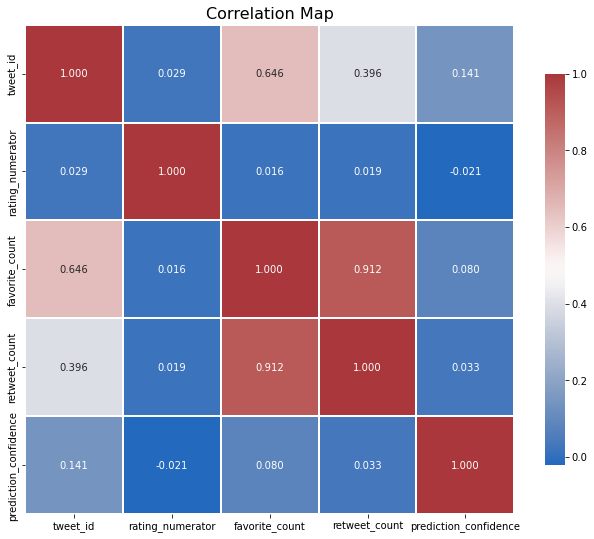

In [132]:
# Plot Relation between all variables
f,ax = plt.subplots(figsize=(11, 9));
sns.heatmap(df_master_clean[[
    'tweet_id', 'tweet_source',
    'rating_numerator','favorite_count',
    'retweet_count','prediction_confidence'
]].corr(),
            cmap="vlag", square=True, annot=True, fmt= '.3f',ax=ax,
           linewidth=0.2, cbar_kws={"shrink": .8});
plt.title('Correlation Map', fontsize=16);

> From the map: we see a very strong relationship between 'favorite_count' and 'retweet_count'

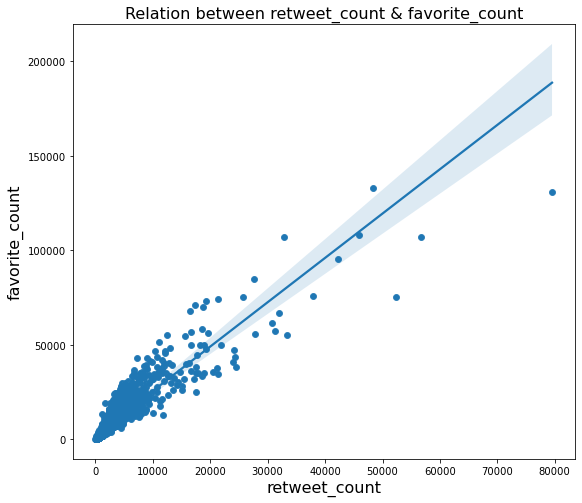

In [145]:
# plot the relationship between 'favorite_count' and 'retweet_count' 
#  define plot size
plt.figure(figsize=(9, 8));
sns.scatterplot(data = df_master_clean, x = 'retweet_count', y = 'favorite_count')
sns.regplot(x="retweet_count", y="favorite_count",data=df_master_clean);
# Set title and labels
plt.title("Relation between retweet_count & favorite_count", fontsize=16);
plt.xlabel('retweet_count', fontsize=16)
plt.ylabel('favorite_count', fontsize=16)
plt.show();

> There is a very strong possitive relationship between 'favorite_count' and 'retweet_count' 

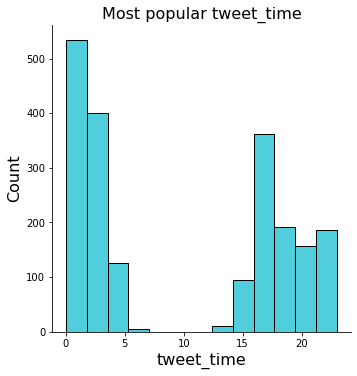

In [134]:
# Plot 'tweet_time' 
colors = sns.color_palette()
sns.displot(df_master_clean, x='tweet_time', color=colors[9]);
plt.title("Most popular tweet_time", fontsize=16);
plt.xlabel('tweet_time', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

> The least interactive hours on Twitter are between 7 am and 1 pm

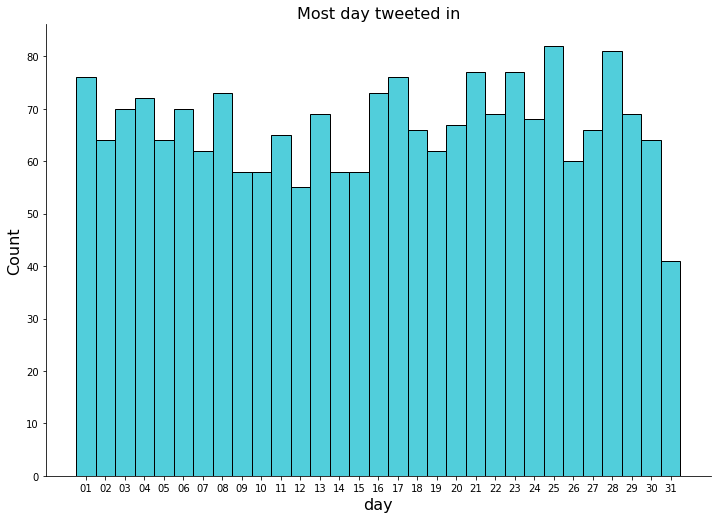

In [135]:
#plot Most day tweeted in
days = df_master_clean.sort_values("day", ascending=True)
colors = sns.color_palette()
sns.displot(days, x="day", height=7, aspect=10/7, color=colors[9]);
plt.title("Most day tweeted in", fontsize=16);
plt.xlabel('day', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

> The most engaged day on Twitter of the month is 25th

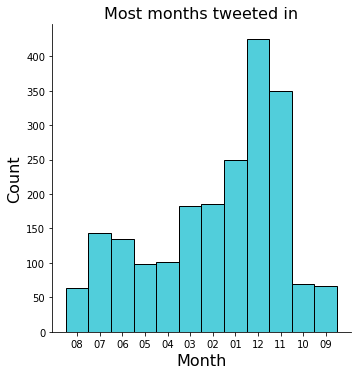

In [136]:
#plot Most months tweeted in
colors = sns.color_palette()
sns.displot(df_master_clean, x="month", color=colors[9]);
plt.title("Most months tweeted in", fontsize=16);
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

> The most engaged month on Twitter is december

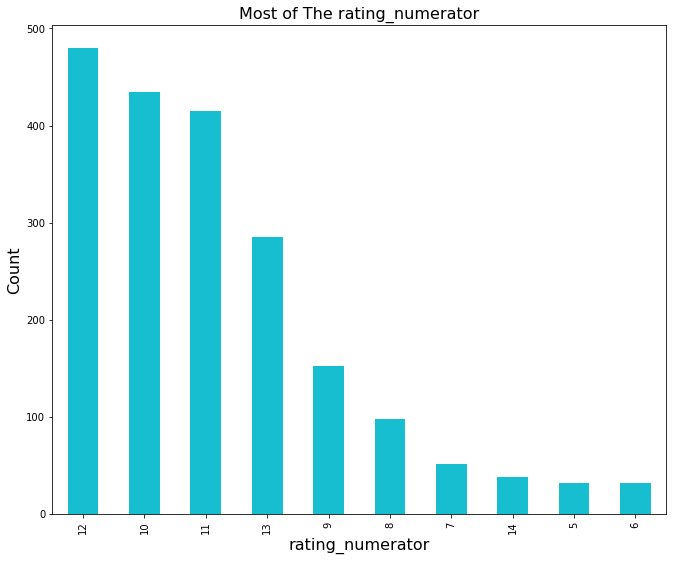

In [150]:
#plot rating_out_of_ten
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
rating_out_of_ten = df_master_clean.groupby('rating_numerator').filter(lambda x: len(x) >= 20)
rating_out_of_ten['rating_numerator'].value_counts().plot(kind = 'bar', color=colors[9])
plt.title('Most of The rating_numerator', fontsize=16);
plt.xlabel('rating_numerator', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

> 12/10 is the most rating_numerator

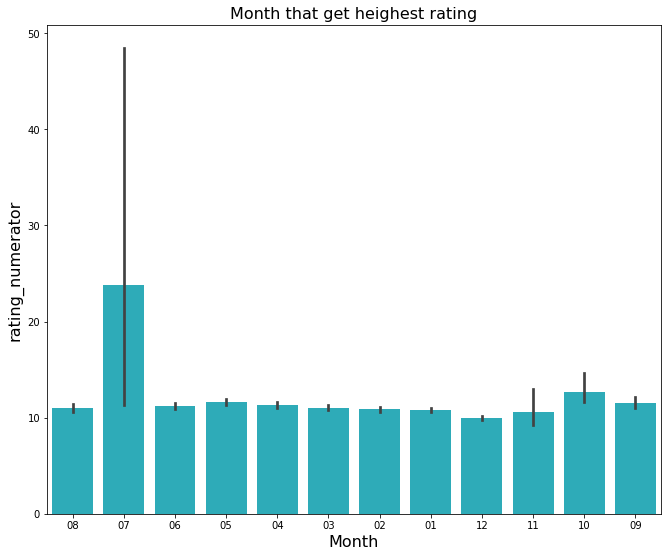

In [138]:
# plot the month that get heighest rating 
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
sns.barplot(x="month", y="rating_numerator", data=df_master_clean,
            label="Rating", color=colors[9]);
plt.title("Month that get heighest rating", fontsize=16);
plt.xlabel('Month', fontsize=16)
plt.ylabel('rating_numerator', fontsize=16)
plt.show();

> July is the month that had most rating_numerator.

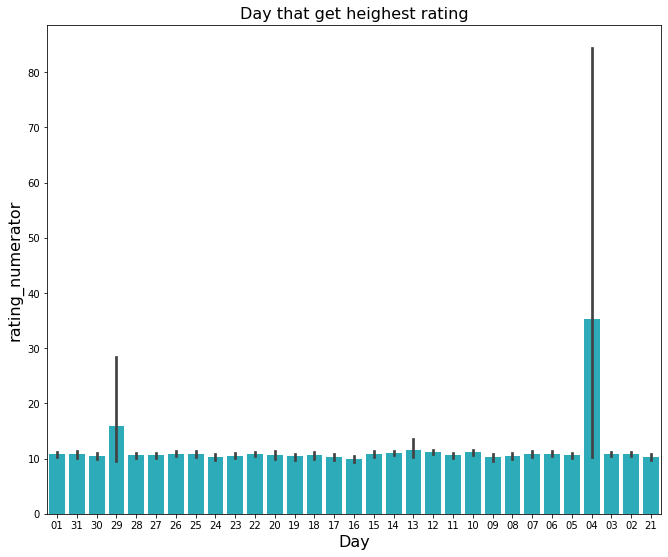

In [189]:
# plot the month that get heighest rating 
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
sns.barplot(x="day", y="rating_numerator", data=df_master_clean,
            label="Rating", color=colors[9]);
plt.title("Day that get heighest rating", fontsize=16);
plt.xlabel('Day', fontsize=16)
plt.ylabel('rating_numerator', fontsize=16)
plt.show();

> 4th day of the month is the day that had most rating_numerator

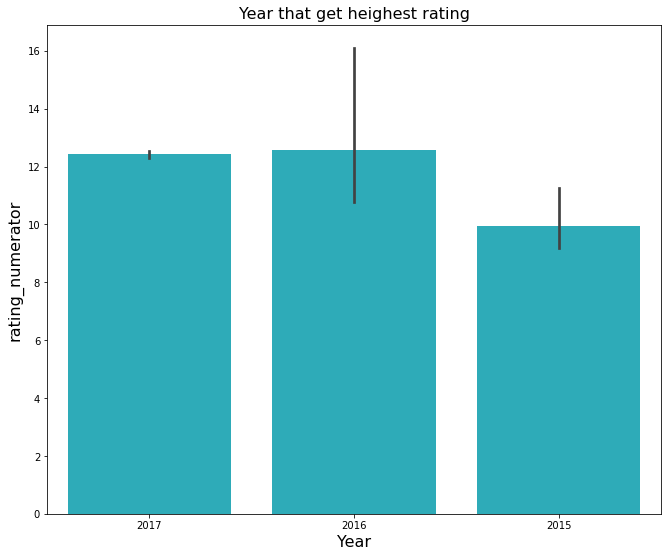

In [151]:
# plot the month that get heighest rating 
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
sns.barplot(x="year", y="rating_numerator", data=df_master_clean,
            label="Rating", color=colors[9]);
plt.title("Year that get heighest rating", fontsize=16);
plt.xlabel('Year', fontsize=16)
plt.ylabel('rating_numerator', fontsize=16)
plt.show();

> Year 2016 had the most rating_numerator

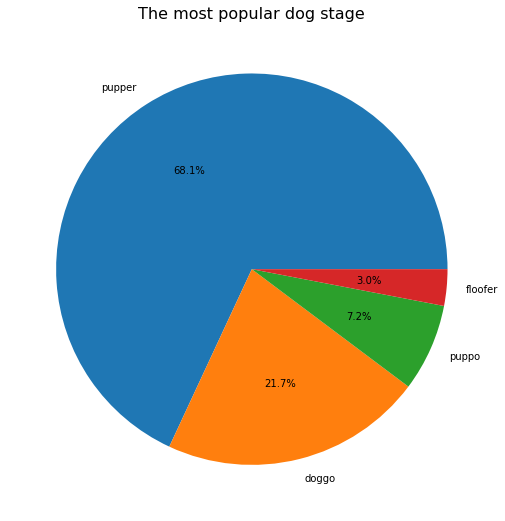

In [141]:
#plot the most popular dog stage
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
label= ['pupper','doggo','puppo','floofer']
plt.pie(df_master_clean['dogtionary'].value_counts(),labels=label, colors = colors, autopct='%1.1f%%')
plt.title('The most popular dog stage', fontsize=16)
plt.show()

> Pupper the Most popular dog_stage

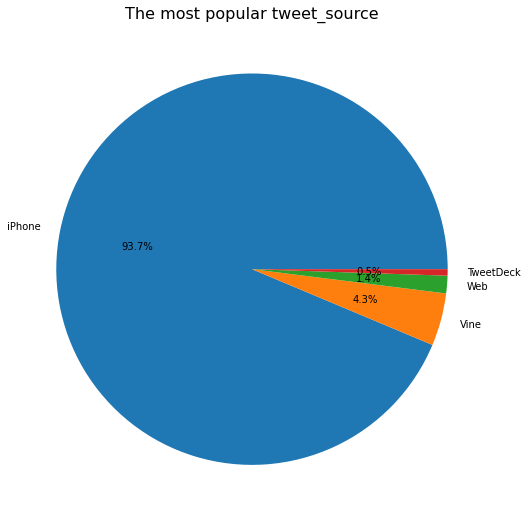

In [187]:
#plot the most popular dog stage
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
label= ['iPhone','Vine','Web','TweetDeck']
plt.pie(df_master_clean['tweet_source'].value_counts(),labels=label, colors = colors, autopct='%1.1f%%')
plt.title('The most popular tweet_source', fontsize=16)
plt.show()

> iPhone the most popular source for tweets

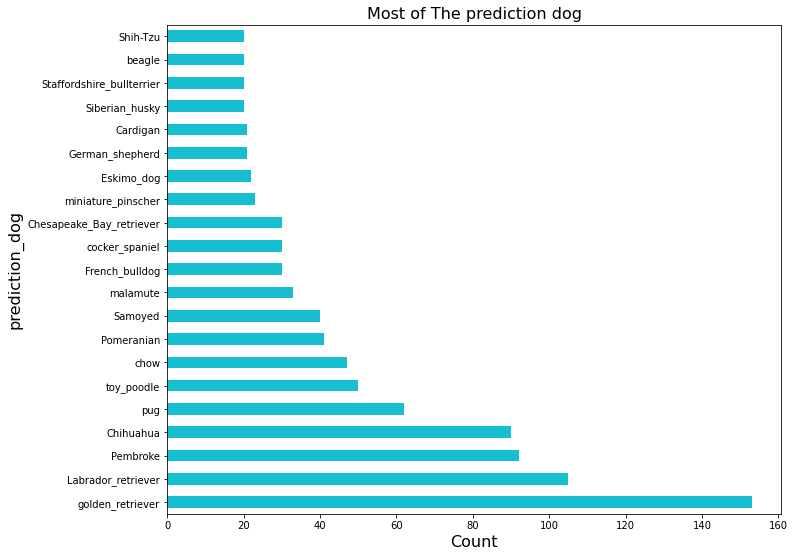

In [143]:
# specify the lengh to get good result
plt.figure(figsize=(11, 9));
colors = sns.color_palette()
prediction_dog = df_master_clean.groupby('prediction_dog').filter(lambda x: len(x) >= 20)
prediction_dog['prediction_dog'].value_counts().plot(kind = 'barh', color=colors[9])
plt.title('Most of The prediction dog', fontsize=16);
plt.xlabel('Count', fontsize=16);
plt.ylabel('prediction_dog', fontsize=16);

> Golden_retriever is the most prediction dog

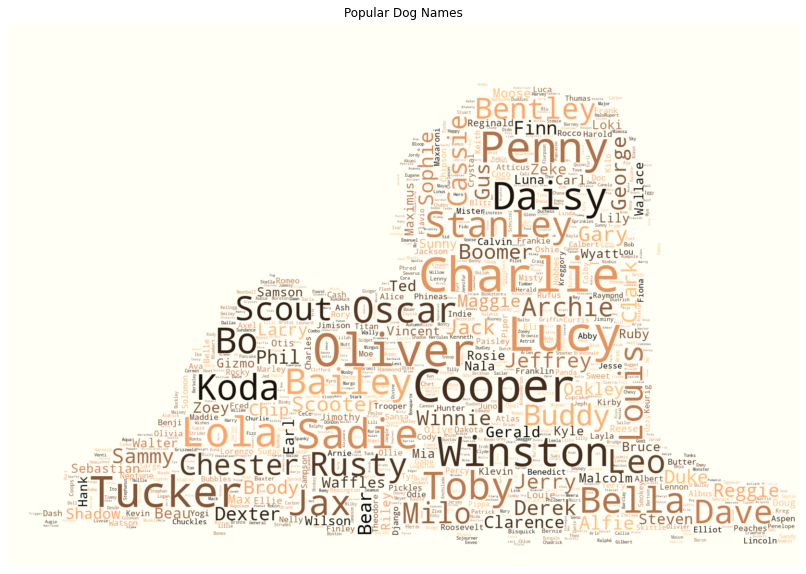

In [188]:
#  creating wordcloud with most frequent names for Dogs
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


#  create the word cloud text
text = []
for name in df_master_clean.dog_name.values:
    # excluding NaN
    if name != np.nan:
        text.append(name)
text = ' '.join(map(str, text))
text = text.replace('nan','')


# read the image from directory path
dog_mask = np.array(Image.open(path.join(d, "images/golden-retriever.png")))

wc = WordCloud(
    width = 500,
    height = 480,
    background_color="#fffff6",
    max_words=5000,
    mask = dog_mask,
    colormap='copper',
    max_font_size=100,
    random_state=42
)
# generate word cloud
wc.generate(text)

#  show word cloud
plt.figure(figsize=(20, 10));
plt.axis("off")
plt.title("Popular Dog Names");
plt.imshow(wc, interpolation="bilinear");
